# IPL Match Winner Prediction 


 ## Data Loading & Understanding


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\divya\Downloads\ipl_matches.csv")
df


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
# Copying the Data 
ipl=df.copy()

In [4]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Data Cleaning


In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Handling Missing Values

In [6]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Droping unwanted columns

In [7]:
 ipl = ipl.drop(columns=["umpire3"])

In [8]:
ipl.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [9]:
# Update null city values where venue is Dubai International Cricket Stadium
ipl.loc[ipl['city'].isna() & (ipl['venue'] == "Dubai International Cricket Stadium"), 'city'] = "Dubai"


In [10]:
ipl['winner'].fillna('No Result', inplace=True)

In [11]:
ipl['player_of_match'] = ipl.apply(
    lambda row: 'No Award' if row['winner'] == 'No Result' and pd.isnull(row['player_of_match']) 
    else ('Unknown' if pd.isnull(row['player_of_match']) else row['player_of_match']), 
    axis=1
)

In [12]:
ipl['umpire2'].fillna('Not Assigned', inplace=True)
ipl['umpire1'].fillna('Not Assigned', inplace=True)

In [13]:
ipl.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [14]:
ipl.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [15]:
 ipl = ipl.drop(columns=["id"])

In [16]:
# Convert 'date' column to datetime
ipl["date"] = pd.to_datetime(ipl["date"], errors="coerce", dayfirst=True)

# Convert specific columns to integer
for col in ["dl_applied", "win_by_runs", "win_by_wickets"]:
    if col in ipl.columns:
        ipl[col] = ipl[col].fillna(0).astype(int)



### Rectifying Inconsistencies

In [17]:
# Replace variations with one standard name
# Standardize city names
ipl["city"] = ipl["city"].replace({"Bangalore": "Bengaluru"})


In [18]:
ipl.dtypes

Season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [19]:
ipl['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [20]:
team_map = {
    'Rising Pune Supergiant' : 'Rising Pune Supergiants',
    'Delhi Daredevils' : 'Delhi Capitals',
    'Pune Warriors' :'Rising Pune Supergiants'
    }

columns = ['team1', 'team2', 'toss_winner', 'winner']

for col in columns :
    ipl[col] = ipl[col].replace(team_map)

In [21]:
ipl.tail(30)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
726,IPL-2019,Mumbai,2019-04-15,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon
727,IPL-2019,Mohali,2019-04-16,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,12,0,R Ashwin,IS Bindra Stadium,Anil Chaudhary,Vineet Kulkarni
728,IPL-2019,Hyderabad,2019-04-17,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Sunrisers Hyderabad,0,6,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,Ian Gould,Ulhas Gandhe
729,IPL-2019,Delhi,2019-04-18,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford
730,IPL-2019,Kolkata,2019-04-19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens,Ian Gould,Nitin Menon
731,IPL-2019,Jaipur,2019-04-20,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,SPD Smith,Sawai Mansingh Stadium,S Ravi,Yeshwant Barde
732,IPL-2019,Delhi,2019-04-20,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SS Iyer,Feroz Shah Kotla Ground,Ulhas Gandhe,C Shamshuddin
733,IPL-2019,Hyderabad,2019-04-21,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,K Ahmed,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Nigel Llong
734,IPL-2019,Bengaluru,2019-04-21,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,1,0,PA Patel,M. Chinnaswamy Stadium,Vineet Kulkarni,Rod Tucker
735,IPL-2019,Jaipur,2019-04-22,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,RR Pant,Sawai Mansingh Stadium,S Ravi,Nanda Kishore


In [22]:
ipl.head(30)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,IPL-2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Not Assigned,Not Assigned
5,IPL-2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,IPL-2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,IPL-2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,IPL-2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,IPL-2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [23]:
ipl.dtypes

Season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [24]:
'''from sklearn.preprocessing import LabelEncoder

# List of columns to encode
cols = ["team1", "team2", "toss_winner", "toss_decision", "result", "winner", "city", "venue"]

le = LabelEncoder()

# Label encode and convert to int
for col in cols:
    ipl[col] = le.fit_transform(ipl[col]).astype(int)

# Check result
ipl[cols].dtypes'''

'from sklearn.preprocessing import LabelEncoder\n\n# List of columns to encode\ncols = ["team1", "team2", "toss_winner", "toss_decision", "result", "winner", "city", "venue"]\n\nle = LabelEncoder()\n\n# Label encode and convert to int\nfor col in cols:\n    ipl[col] = le.fit_transform(ipl[col]).astype(int)\n\n# Check result\nipl[cols].dtypes'

In [25]:
ipl.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,IPL-2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Not Assigned,Not Assigned


### Observation on Data Cleaning

* Missing values in Winner column is replaced by "No Result" and city with "Dubai".
* In Umpire 3 column has 84% of missing values so i droped it.
* Dropping unwanted columns like Id, Umpire, venue, Season, Date, Player of match, Win by runs and     Win by wickets.
* Rectified inconsistent values.
* Used One-Hot Encoding and Labelled Encoding.


## EDA


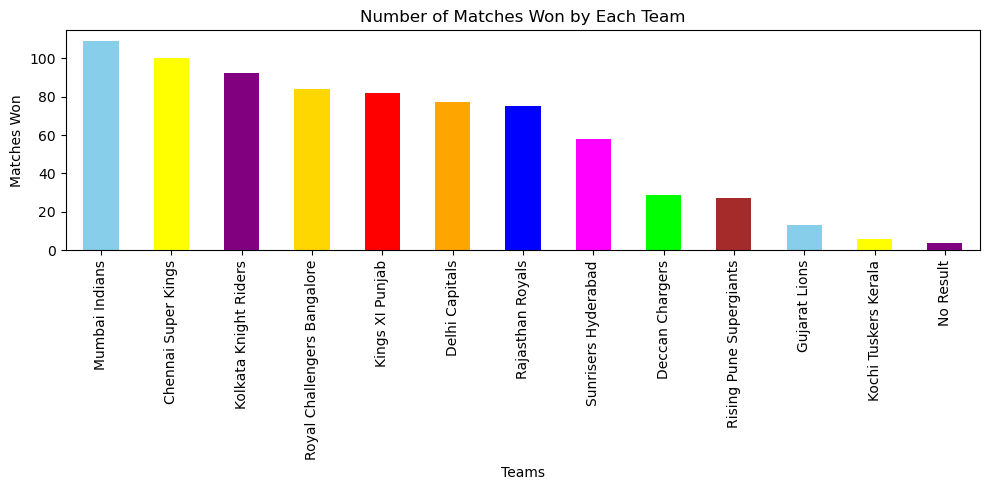

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Define a list of colors
colors = ['skyblue', 'yellow', 'purple', 'gold', 'red', 'orange', 'blue', 'magenta', 'lime', 'brown']

# Pass the list of colors to the 'color' parameter
ipl['winner'].value_counts().plot(kind='bar', color=colors)

plt.title('Number of Matches Won by Each Team')
plt.xlabel('Teams')
plt.ylabel('Matches Won')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

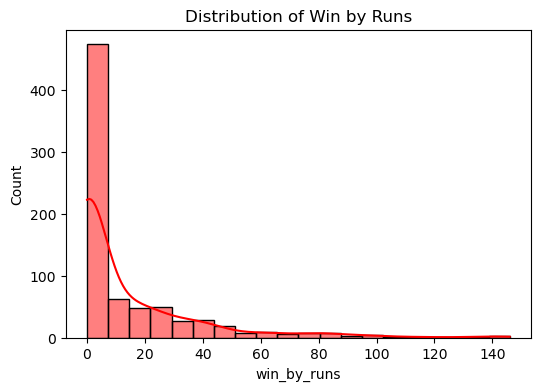

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(ipl['win_by_runs'], bins=20, kde=True, color='red')
plt.title("Distribution of Win by Runs")
plt.show()

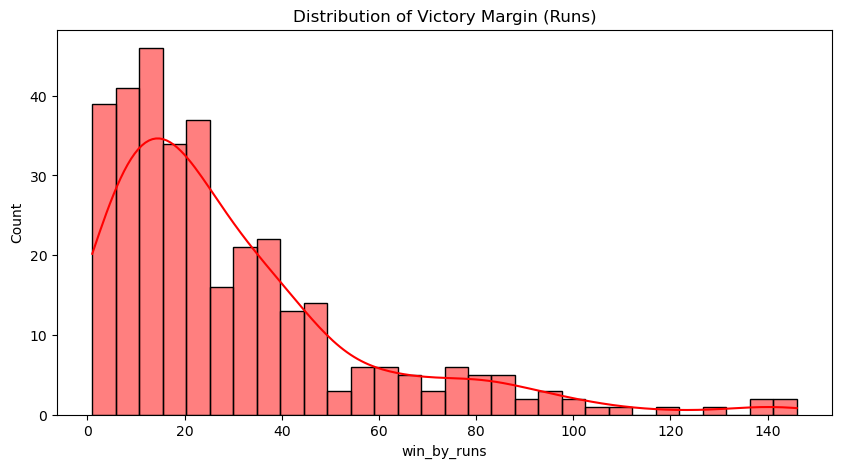

In [28]:
# 3. Victory Margin (Runs)
plt.figure(figsize=(10,5))
sns.histplot(ipl[ipl['win_by_runs'] > 0]['win_by_runs'], bins=30, kde=True, color="red")
plt.title("Distribution of Victory Margin (Runs)")
plt.show()


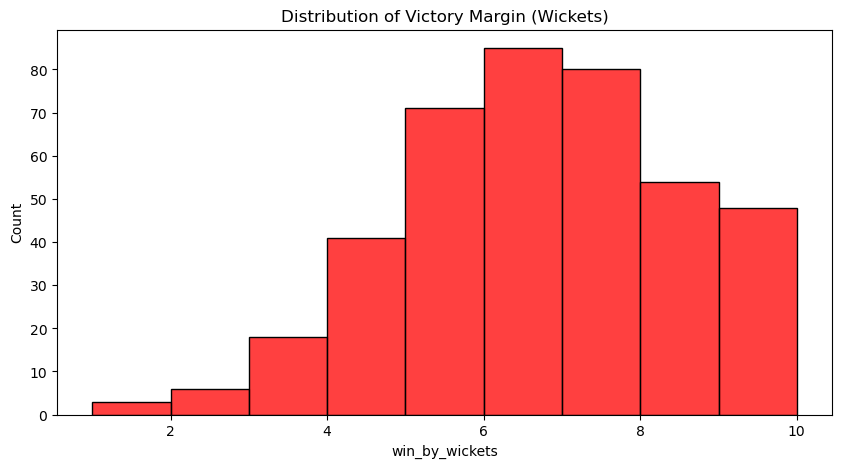

In [29]:
# 4. Victory Margin (Wickets)
plt.figure(figsize=(10,5))
sns.histplot(ipl[ipl['win_by_wickets'] > 0]['win_by_wickets'], bins=9, kde=False, color="red")
plt.title("Distribution of Victory Margin (Wickets)")
plt.show()

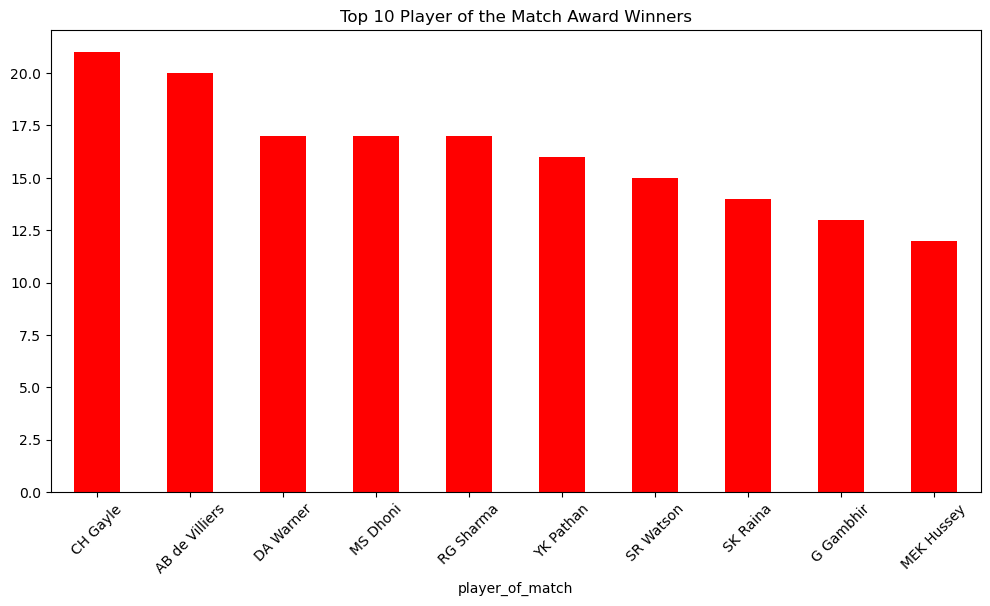

In [30]:
# 5. Most Player of the Match Awards
plt.figure(figsize=(12,6))
ipl['player_of_match'].value_counts().head(10).plot(kind='bar', color='red')
plt.title("Top 10 Player of the Match Award Winners")
plt.xticks(rotation=45)
plt.show()


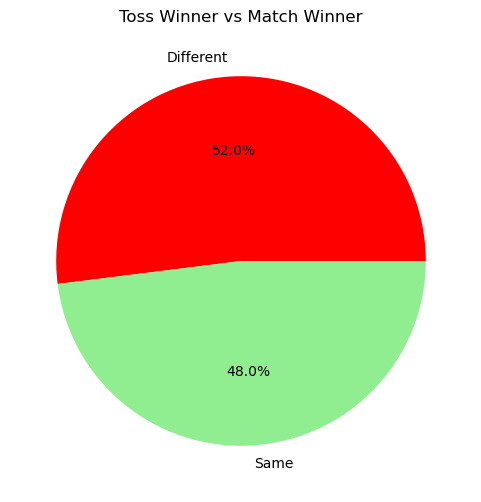

In [31]:

# 2. PIE CHART - Toss vs Match Winner

plt.figure(figsize=(6,6))
(ipl['toss_winner'] == ipl['winner']).value_counts().plot(
    kind='pie', autopct='%1.1f%%', labels=['Different','Same'], colors=['red','lightgreen'])
plt.title("Toss Winner vs Match Winner")
plt.ylabel("")
plt.show()

 HEATMAP - Correlation



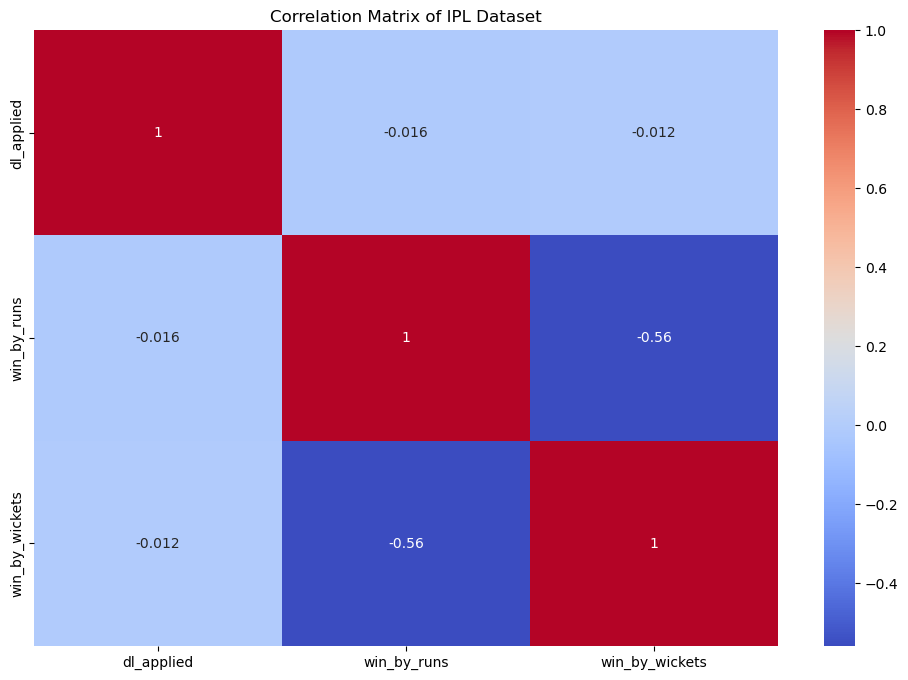

In [32]:
numerical_cols = ipl.select_dtypes(include=['int64', 'float64','int32']).columns
numerical_data = ipl[numerical_cols]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of IPL Dataset")
plt.show()

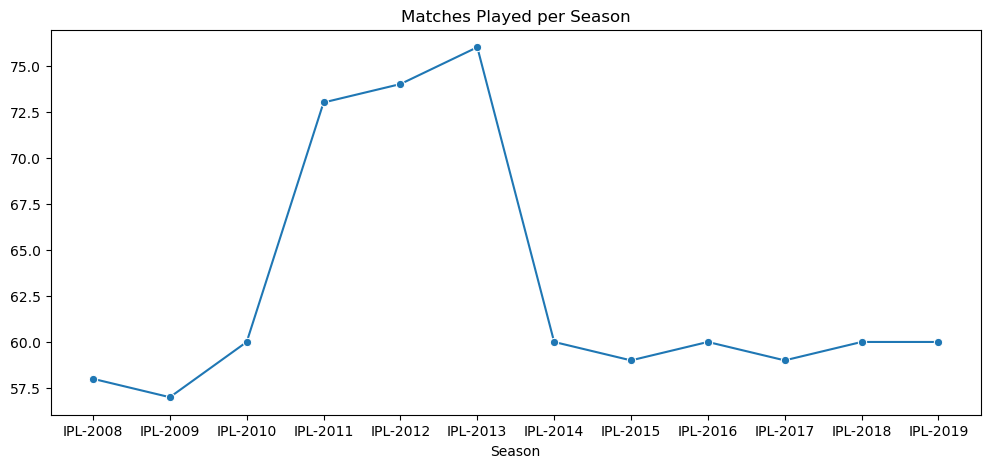

In [33]:
# 11. LINE PLOT - Matches per Season

matches_per_season = ipl['Season'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=matches_per_season.index, y=matches_per_season.values, marker='o')
plt.title("Matches Played per Season")
plt.show()


Text(0, 0.5, 'Count')

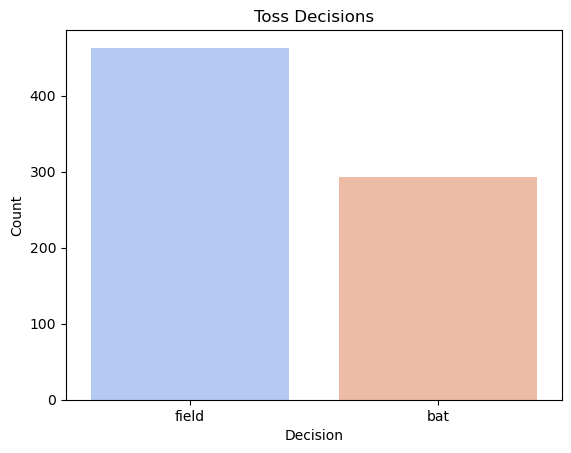

In [34]:
#  Toss decision counts
plt.subplot(1, 1, 1)
sns.countplot(data=ipl, x='toss_decision', hue='toss_decision', palette='coolwarm', legend=False)
plt.title('Toss Decisions')
plt.xlabel('Decision')
plt.ylabel('Count')

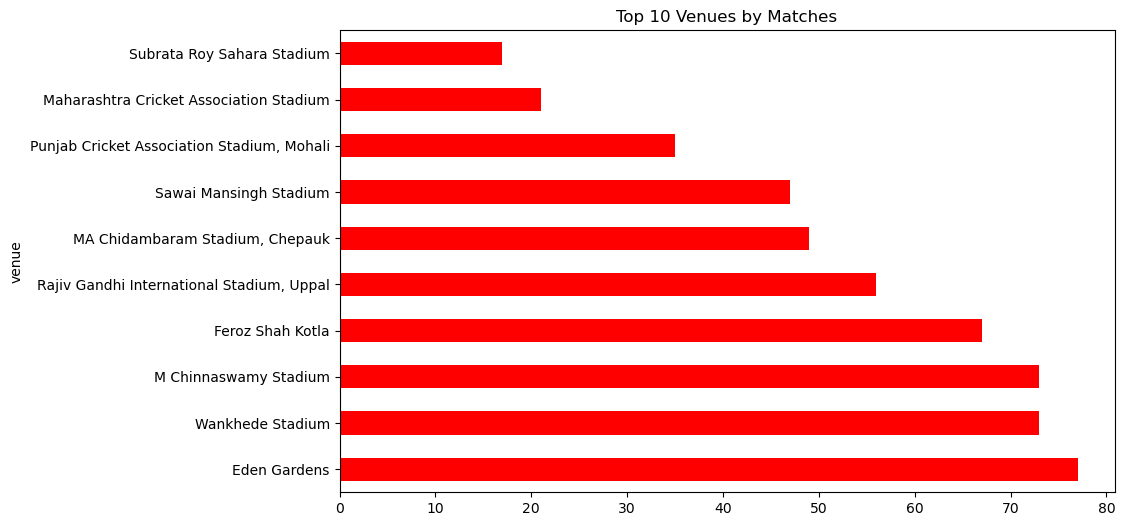

In [35]:
# 12. BARH CHART - Top Venues

plt.figure(figsize=(10,6))
ipl['venue'].value_counts().head(10).plot(kind='barh', color='red')
plt.title("Top 10 Venues by Matches")
plt.show()


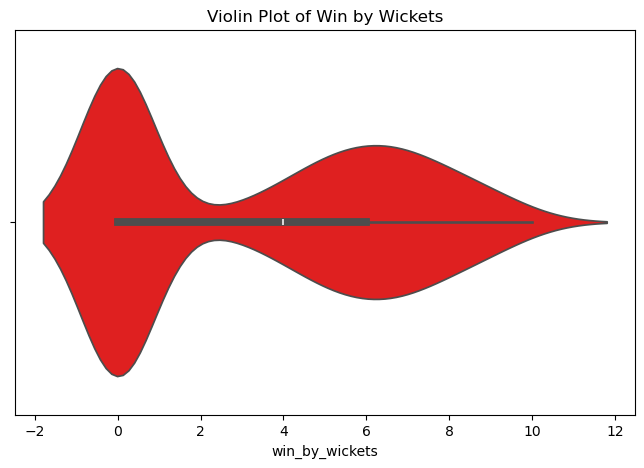

In [36]:
# 7. VIOLIN PLOT - Win by Wickets

plt.figure(figsize=(8,5))
sns.violinplot(x=ipl['win_by_wickets'] , color='red')
plt.title("Violin Plot of Win by Wickets")
plt.show()

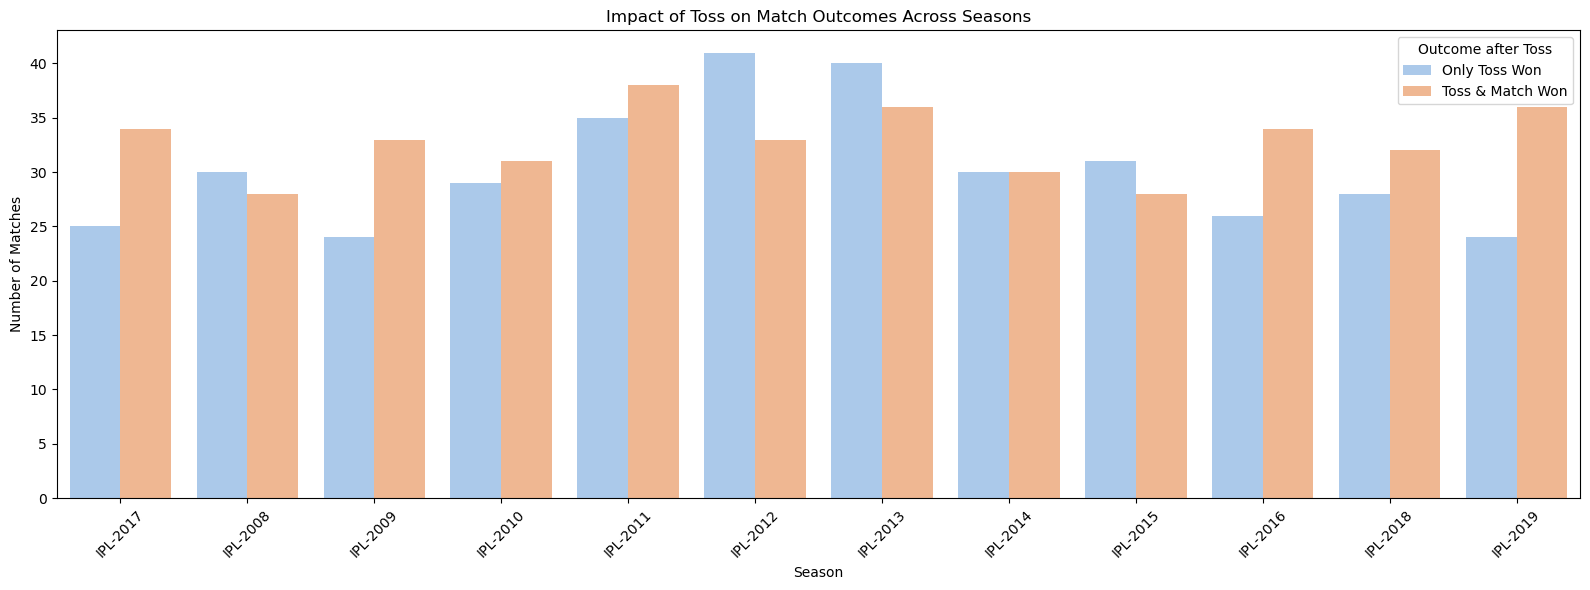

In [37]:

# Create a label for whether toss winner also won the match
ipl['toss_win_label'] = ipl.apply(
    lambda x: 'Toss & Match Won' if x['toss_winner'] == x['winner'] else 'Only Toss Won',
    axis=1
)

plt.figure(figsize=(16, 6))
sns.countplot(
    data=ipl,
    x='Season',
    hue='toss_win_label',
    palette='pastel'
)
plt.title('Impact of Toss on Match Outcomes Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Outcome after Toss')
plt.tight_layout()
plt.show()


### Displaying Outliers

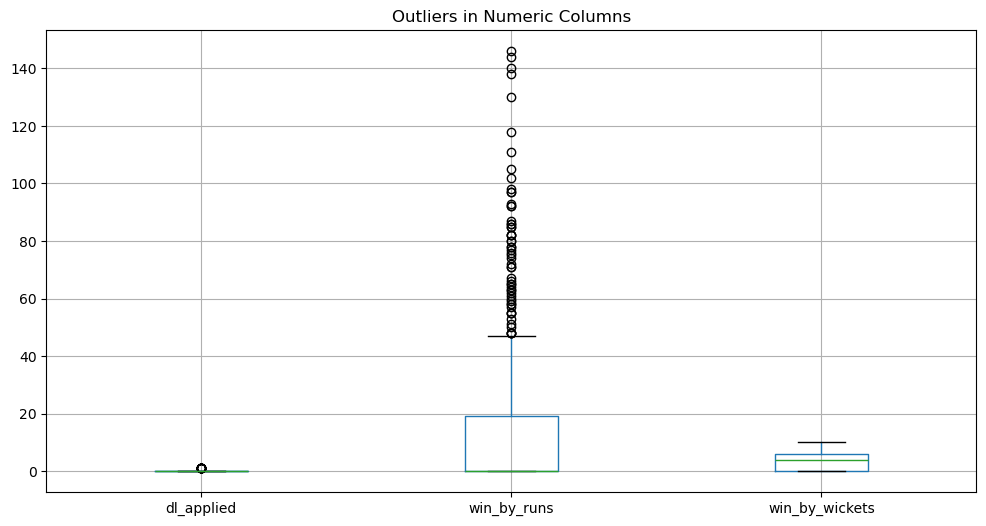

In [38]:
import matplotlib.pyplot as plt

# Display outliers for all numeric columns
ipl.boxplot(figsize=(12,6))
plt.title("Outliers in Numeric Columns")
plt.show()


### Observations on EDA

* Mumbai Indians won 110 matches followed by Chennai Super Kings with 100 wins.
* 61% of teams choosing Bowling after winning the Toss.
* Toss winning team have 52% of winning rate to win the match.
* 100 matches are played on Mumbai City followed by Kolkata and Delhi.
* Good correlation between toss winner and winner so toss winner impacting the match winner.

## Data Preprocessing

In [39]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
cols = ["team1", "team2", "toss_winner", "toss_decision", "result", "winner", "city", "venue"]

le = LabelEncoder()

# Label encode and convert to int
for col in cols:
    ipl[col] = le.fit_transform(ipl[col]).astype(int)
    for i, cls in enumerate(le.classes_):
        print(f"{i} --> {cls}")
    

print(f" mapping for {cols}:")

# Check result
ipl[cols].dtypes

0 --> Chennai Super Kings
1 --> Deccan Chargers
2 --> Delhi Capitals
3 --> Gujarat Lions
4 --> Kings XI Punjab
5 --> Kochi Tuskers Kerala
6 --> Kolkata Knight Riders
7 --> Mumbai Indians
8 --> Rajasthan Royals
9 --> Rising Pune Supergiants
10 --> Royal Challengers Bangalore
11 --> Sunrisers Hyderabad
0 --> Chennai Super Kings
1 --> Deccan Chargers
2 --> Delhi Capitals
3 --> Gujarat Lions
4 --> Kings XI Punjab
5 --> Kochi Tuskers Kerala
6 --> Kolkata Knight Riders
7 --> Mumbai Indians
8 --> Rajasthan Royals
9 --> Rising Pune Supergiants
10 --> Royal Challengers Bangalore
11 --> Sunrisers Hyderabad
0 --> Chennai Super Kings
1 --> Deccan Chargers
2 --> Delhi Capitals
3 --> Gujarat Lions
4 --> Kings XI Punjab
5 --> Kochi Tuskers Kerala
6 --> Kolkata Knight Riders
7 --> Mumbai Indians
8 --> Rajasthan Royals
9 --> Rising Pune Supergiants
10 --> Royal Challengers Bangalore
11 --> Sunrisers Hyderabad
0 --> bat
1 --> field
0 --> no result
1 --> normal
2 --> tie
0 --> Chennai Super Kings
1 --> D

team1            int64
team2            int64
toss_winner      int64
toss_decision    int64
result           int64
winner           int64
city             int64
venue            int64
dtype: object

In [40]:
"""from sklearn.preprocessing import LabelEncoder

# List of columns to encode
cols = ["team1", "team2", "toss_winner", "toss_decision", "result", "winner", "city", "venue"]

le = LabelEncoder()

# Label encode and convert to int
for col in cols:
    ipl[col] = le.fit_transform(ipl[col]).astype(int)

# Check result
ipl[cols].dtypes"""


'from sklearn.preprocessing import LabelEncoder\n\n# List of columns to encode\ncols = ["team1", "team2", "toss_winner", "toss_decision", "result", "winner", "city", "venue"]\n\nle = LabelEncoder()\n\n# Label encode and convert to int\nfor col in cols:\n    ipl[col] = le.fit_transform(ipl[col]).astype(int)\n\n# Check result\nipl[cols].dtypes'

In [41]:
ipl.head(5)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_win_label
0,IPL-2017,14,2017-04-05,11,10,10,1,1,0,12,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,Only Toss Won
1,IPL-2017,26,2017-04-06,7,9,9,1,1,0,10,0,7,SPD Smith,21,A Nand Kishore,S Ravi,Toss & Match Won
2,IPL-2017,28,2017-04-07,3,6,6,1,1,0,6,0,10,CA Lynn,31,Nitin Menon,CK Nandan,Toss & Match Won
3,IPL-2017,15,2017-04-08,9,4,4,1,1,0,4,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,Toss & Match Won
4,IPL-2017,2,2017-04-08,10,2,10,0,1,0,11,15,0,KM Jadhav,17,Not Assigned,Not Assigned,Toss & Match Won


In [42]:
X = ipl[['team1','team2','toss_winner','toss_decision','result','win_by_runs','win_by_wickets']]
y = ipl[['winner']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODEL TRAINING



### Logistic Regression



In [44]:
Classifier=LogisticRegression()
Classifier.fit(X_train,y_train)

LogisticRegression()

In [45]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train,y_train)
# testing data prediction
y_pred = LR.predict(X_test)


In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [47]:
print("Logistic Regression ")
print("Logistic Regression Accuracy_score :" ,accuracy_score(y_test,y_pred))
print("Logistic Regression Precision_Score:",precision_score(y_test,y_pred,average='weighted',zero_division=0))
print("Logistic Regression Recall_score:",recall_score(y_test,y_pred,average='weighted',zero_division=0))
print("Logistic Regression F1_score:",f1_score(y_test,y_pred,average='weighted',zero_division=0))

Logistic Regression 
Logistic Regression Accuracy_score : 0.18421052631578946
Logistic Regression Precision_Score: 0.1391945323668687
Logistic Regression Recall_score: 0.18421052631578946
Logistic Regression F1_score: 0.1534586428260609


In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Save column names before transforming X
feature_names = X.columns  

# Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, solver="liblinear")

# RFE selector
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get selected features using saved names
selected_features = feature_names[rfe.support_]
print("Selected Features by RFE:", list(selected_features))

# Train with selected features
log_reg.fit(X_train[:, rfe.support_], y_train)

# Test with selected features
accuracy = log_reg.score(X_test[:, rfe.support_], y_test)
print("Model Accuracy with RFE Features:", accuracy)


Selected Features by RFE: ['team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'win_by_runs', 'win_by_wickets']
Model Accuracy with RFE Features: 0.2236842105263158


## SVM


In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
X = ipl.iloc[:, [3,4,5,6,7,10,11]].values  
y = ipl['winner'].values  

In [51]:
print(X)


[[11 10 10 ...  1 35  0]
 [ 7  9  9 ...  1  0  7]
 [ 3  6  6 ...  1  0 10]
 ...
 [11  2  2 ...  1  0  2]
 [ 2  0  0 ...  1  0  6]
 [ 7  0  7 ...  1  1  0]]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [54]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']   
}
grid_search = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,scoring='accuracy')

grid_search.fit(x_train, y_train)

best_classifier = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

y_pred = best_classifier.predict(x_test)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.8712932774413911


In [55]:
print(" SVM ")
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Precision_Score:",precision_score(y_test,y_pred,average='weighted',zero_division=0))
print("SVM Recall_score:",recall_score(y_test,y_pred,average='weighted',zero_division=0))
print("SVM F1_score:",f1_score(y_test,y_pred,average='weighted',zero_division=0))

 SVM 
SVM Test Accuracy: 0.9153439153439153
SVM Precision_Score: 0.9164987789987791
SVM Recall_score: 0.9153439153439153
SVM F1_score: 0.9088734696927688


## KNN

In [56]:
model= KNN()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
Classifier=KNN(n_neighbors = 5, metric = 'euclidean')
Classifier.fit(X_train, y_train)
test_predict = Classifier.predict(X_test)                            
k_1 = accuracy_score(test_predict, y_test)

In [58]:
print("KNN-")
print("KNN Accuracy_score :" ,accuracy_score(test_predict, y_test))
print("KNN Precision_Score:",precision_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN Recall_score:",recall_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN F1_score:",f1_score(test_predict, y_test,average='weighted',zero_division=0))

KNN-
KNN Accuracy_score : 0.4973544973544973
KNN Precision_Score: 0.566488450521933
KNN Recall_score: 0.4973544973544973
KNN F1_score: 0.5148984510990688


Best k: 2
Minimum error: 0.44973544973544977
Best accuracy: 0.5502645502645502


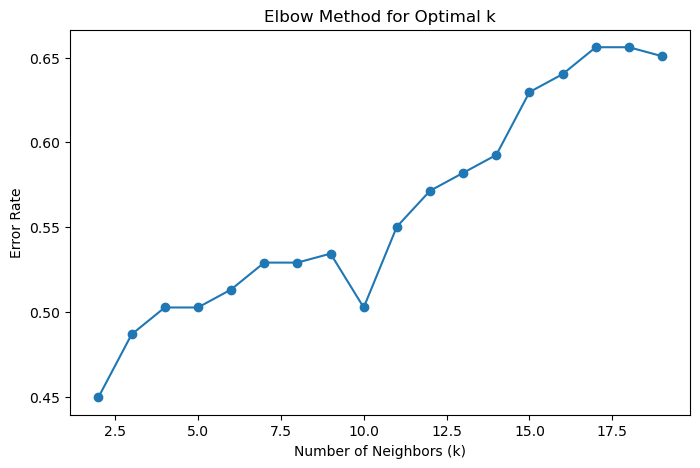

In [59]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def Elbow(k_values):
    test_error = []
    for i in k_values:
        clf = KNN(n_neighbors=i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        error = 1 - acc
        test_error.append(error)
    return test_error

# Define range of k
k_range = range(2, 20)

# Calculate errors
errors = Elbow(k_range)

# Find best k (minimum error)
best_k = k_range[errors.index(min(errors))]
print("Best k:", best_k)
print("Minimum error:", min(errors))
print("Best accuracy:", 1 - min(errors))

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal k")
plt.show()


In [60]:
clf = KNN(n_neighbors = 2)

clf.fit(X_train, y_train)

test_predict = clf.predict(X_test)
k_2 = accuracy_score(test_predict, y_test)

In [61]:
print("Before Elbow Method Knn Score : ", k_1)
print("After Elbow Method to put right K-Value Knn Score : ", k_2)

Before Elbow Method Knn Score :  0.4973544973544973
After Elbow Method to put right K-Value Knn Score :  0.5502645502645502


In [62]:
print(" KNN After Elbow ")
print("KNN Accuracy_score :" ,accuracy_score(test_predict, y_test))
print("KNN Precision_Score:",precision_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN Recall_score:",recall_score(test_predict, y_test,average='weighted',zero_division=0))
print("KNN F1_score:",f1_score(test_predict, y_test,average='weighted',zero_division=0))

 KNN After Elbow 
KNN Accuracy_score : 0.5502645502645502
KNN Precision_Score: 0.5865818143440086
KNN Recall_score: 0.5502645502645502
KNN F1_score: 0.55916384498685


## Decision Tree

In [63]:
dtree = DecisionTreeClassifier(random_state=42)

In [64]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

In [66]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [67]:
print("Decision Tree Training Accuracy:", train_accuracy)
print("Decision Tree Testing Accuracy :", test_accuracy)

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy : 0.8941798941798942


In [68]:
print("\n Classification Report (Decision Tree):\n")
print(classification_report(y_test, y_test_pred))


 Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.86      0.67      0.75         9
           2       0.74      0.93      0.82        15
           3       1.00      1.00      1.00         6
           4       0.86      1.00      0.92        18
           5       1.00      1.00      1.00         1
           6       0.93      0.84      0.88        31
           7       0.91      0.91      0.91        23
           8       0.00      0.00      0.00         0
           9       0.94      0.94      0.94        18
          10       1.00      0.56      0.71         9
          11       0.82      1.00      0.90        14
          12       0.85      0.92      0.88        12

    accuracy                           0.89       189
   macro avg       0.84      0.82      0.82       189
weighted avg       0.91      0.89      0.89       189



In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
dt_clf = DecisionTreeClassifier(random_state = 42)

In [71]:
param_grid = {
    'max_depth' : [3, 5, 10, None],
    'criterion' : ['gini', 'entropy']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model 
best_model = grid_search.best_estimator_
print(best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)


In [72]:
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [73]:
print("\n Output ")
print("Best Parameters : ", grid_search.best_params_)
print("Accuracy : ", accuracy)
print("Confusion Matrix :\n ", conf_matrix)
print("\nClassification Report :\n", classification_report(y_test, y_pred))


 Output 
Best Parameters :  {'criterion': 'entropy', 'max_depth': 10}
Accuracy :  0.9682539682539683
Confusion Matrix :
  [[30  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  1]
 [ 0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       1.00      1.00      1.00         9
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00         1
   

In [74]:
print(" D  Tree ")
print("DTree Accuracy_score  :" ,accuracy_score(y_test, y_pred))
print("DTree Precision_Score :",precision_score(y_test, y_pred,average='weighted',zero_division=0))
print("Dtree Recall_score    :",recall_score(y_test, y_pred,average='weighted',zero_division=0))
print("Dtree F1_score        :",f1_score(y_test, y_pred,average='weighted',zero_division=0))

 D  Tree 
DTree Accuracy_score  : 0.9682539682539683
DTree Precision_Score : 0.9714447182381724
Dtree Recall_score    : 0.9682539682539683
Dtree F1_score        : 0.9684152091699019


## Random forest

In [75]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(oob_score = True, random_state = 42), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_rf  = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [76]:
y_pred = best_rf.predict(x_test)

In [77]:
RandomForestClassifier()

RandomForestClassifier()

In [78]:
best_rf.oob_score_

0.890652557319224

In [79]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [80]:
print("\nOutput ")
print("Best Parameters : ", grid_search.best_params_)
print("Accuracy : ", accuracy)
print("Confusion Matrix :\n ", conf_matrix)
print("\nClassification Report :\n", classification_report(y_test, y_pred))


Output 
Best Parameters :  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy :  0.8994708994708994
Confusion Matrix :
  [[32  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  5  4  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  1  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  1  0]
 [ 0  0  0  0  1  0  0 21  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  3  2  1]
 [ 0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 11]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      0.56      0.71         9
           2       0.79      1.00      0.88        15
           3       1.00      0.83      0.91         6
           4       0.84      0.89      0.86        18
           5       0.00      0.00    

In [81]:
print("Random Forest")
print("Random Forest Accuracy_score  :" ,accuracy_score(y_test, y_pred))
print("Random Forest Precision_Score :",precision_score(y_test, y_pred,average='weighted',zero_division=0))
print("Random Forest Recall_score    :",recall_score(y_test, y_pred,average='weighted',zero_division=0))
print("Random Forest F1_score        :",f1_score(y_test, y_pred,average='weighted',zero_division=0))

Random Forest
Random Forest Accuracy_score  : 0.8994708994708994
Random Forest Precision_Score : 0.9082175907572733
Random Forest Recall_score    : 0.8994708994708994
Random Forest F1_score        : 0.8895275996326417


## XG Boost

In [82]:
import xgboost as xgb 

In [83]:
model=xgb.XGBClassifier(n_jobs=-1)

In [84]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [85]:
y_pred=model.predict(x_test)

In [86]:
print(" XG_Boost ")
print("XG_Boost Accuracy_score  :" ,accuracy_score(y_test, y_pred))
print("XG_Boost Precision_Score :",precision_score(y_test, y_pred,average='weighted',zero_division=0))
print("XG_Boost Recall_score    :",recall_score(y_test, y_pred,average='weighted',zero_division=0))
print("XG_Boost F1_score        :",f1_score(y_test, y_pred,average='weighted',zero_division=0))

 XG_Boost 
XG_Boost Accuracy_score  : 0.9788359788359788
XG_Boost Precision_Score : 0.9753776510604242
XG_Boost Recall_score    : 0.9788359788359788
XG_Boost F1_score        : 0.9763089292640414


## AdaBoost Model

In [87]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

adb = AdaBoostClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_adb = GridSearchCV(adb, param_grid, cv=5, scoring='accuracy')
grid_adb.fit(X_train, y_train)

# Best model
best_adb = grid_adb.best_estimator_
y_pred = best_adb.predict(X_test)

# =============================
# Evaluation
# =============================
print("AdaBoost Classifier")
print("Best Params:", grid_adb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


AdaBoost Classifier
Best Params: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.4126984126984127
Precision: 0.4163965497593686
Recall: 0.4126984126984127
F1 Score: 0.37658077415810487
Confusion Matrix:
 [[24  0  0  0  0  0  0  2  3  0  3  1]
 [ 1  1  0  0  1  0  2  2  0  0  2  0]
 [ 1  0  7  0  1  0  3  3  0  0  0  0]
 [ 0  0  3  0  0  0  0  2  0  0  1  0]
 [ 0  0  3  0  3  0  3  6  0  0  2  1]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  4  0  2  0 13  7  0  0  0  2]
 [ 1  0  0  0  0  0  3 17  0  0  0  2]
 [ 2  0  0  0  0  0  5  9  2  0  0  0]
 [ 1  0  0  0  0  0  1  6  0  0  0  1]
 [ 0  0  1  0  0  0  7  1  0  1  4  0]
 [ 1  0  0  0  0  0  0  0  2  0  2  7]]


 ## GridSearch

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Example: best model = Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test)
print("Best Parameters (GridSearch):", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (GridSearch): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.8994708994708994
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      0.56      0.71         9
           2       0.79      1.00      0.88        15
           3       1.00      0.83      0.91         6
           4       0.84      0.89      0.86        18
           5       0.00      0.00      0.00         1
           6       0.91      0.97      0.94        31
           7       1.00      0.91      0.95        23
           9       0.82      1.00      0.90        18
          10       1.00      0.33      0.50         9
          11       0.82      1.00      0.90        14
          12       0.85      0.92      0.88        12

    accuracy                           0.90       189
   macro a

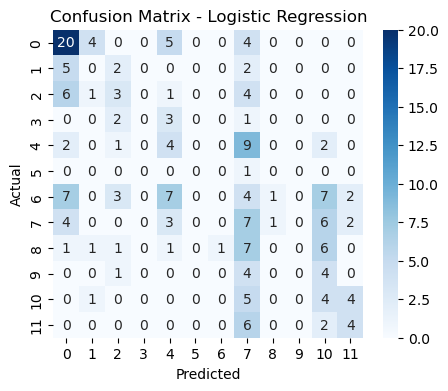

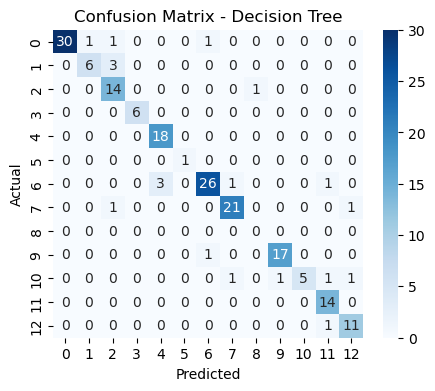

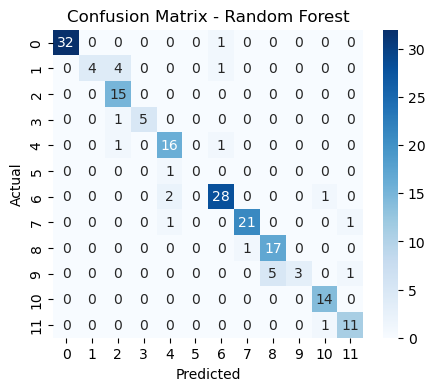

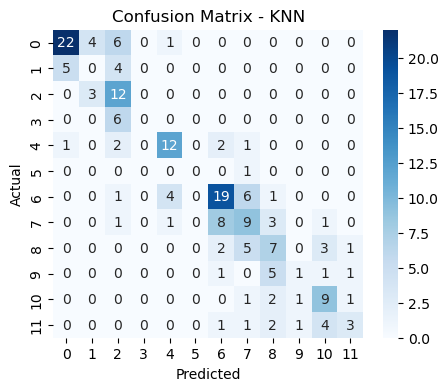

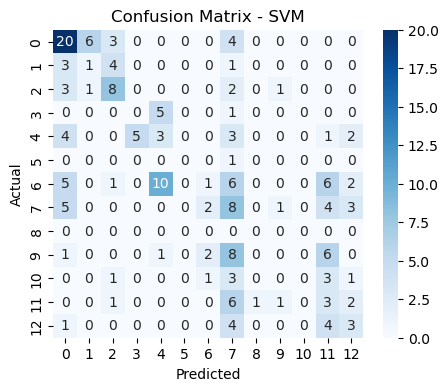

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear")
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)   # train the model
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results.append([name, acc, prec, rec, f1])
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



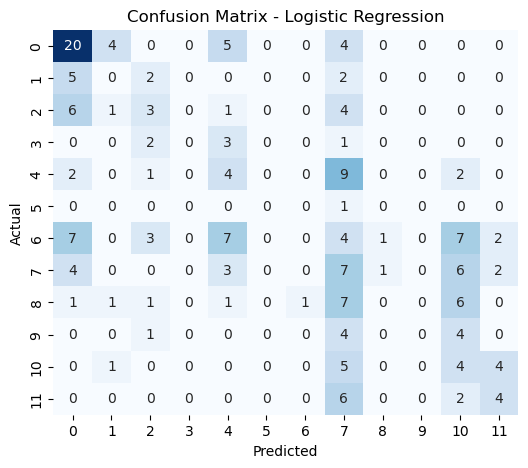

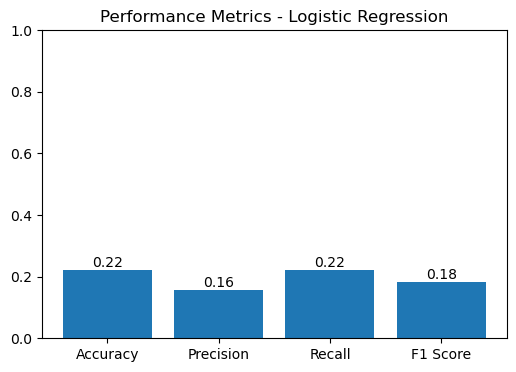

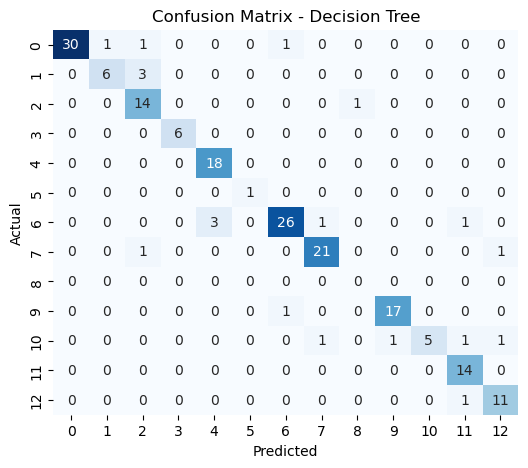

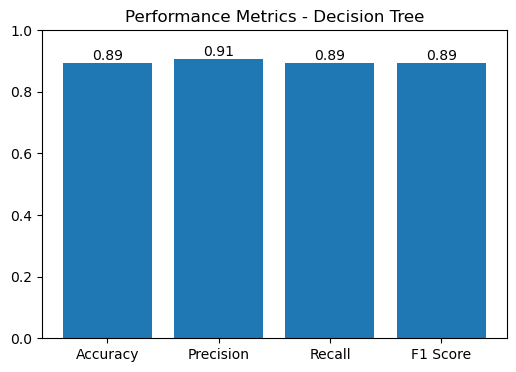

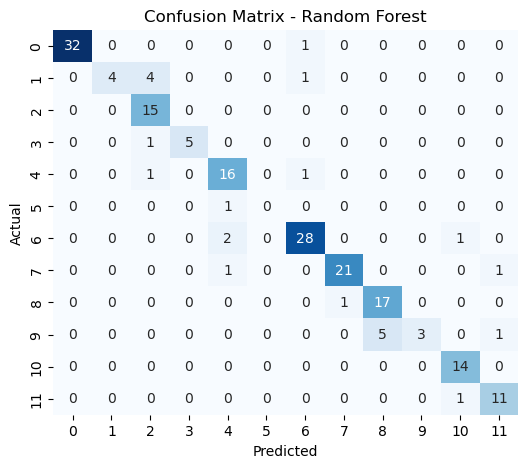

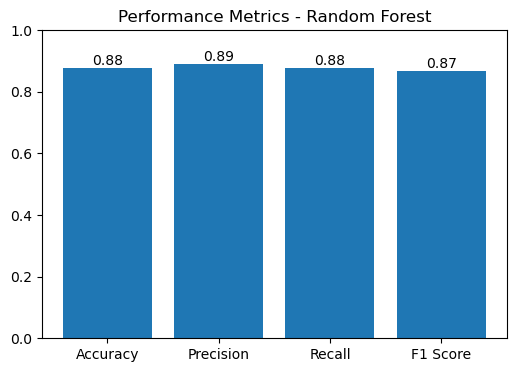

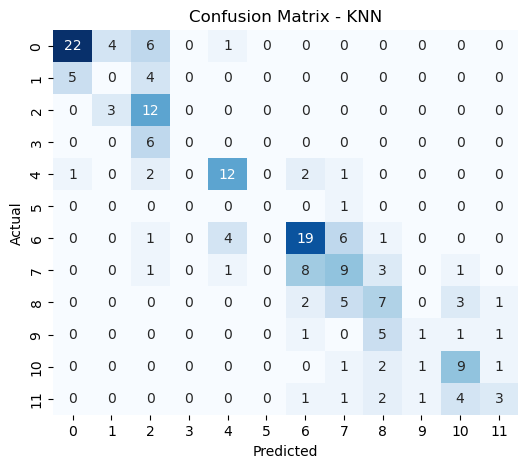

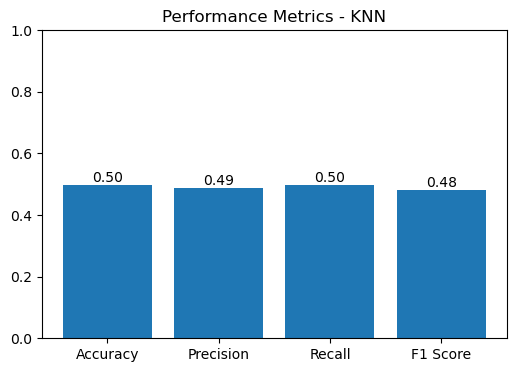

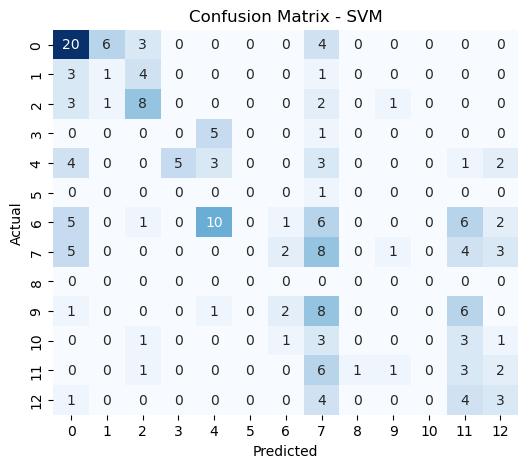

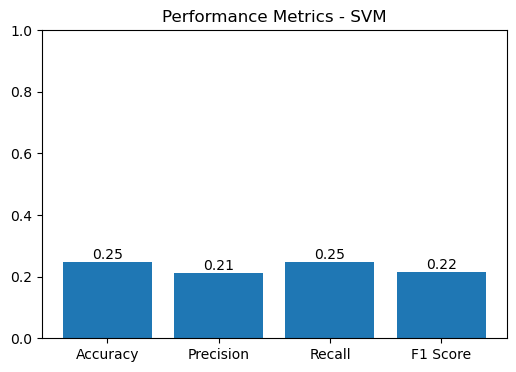

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Loop through each model
for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # ==========================
    # 1. Confusion Matrix
    # ==========================
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ==========================
    # 2. Metrics Bar Chart
    # ==========================
    metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
    plt.figure(figsize=(6,4))
    plt.bar(metrics.keys(), metrics.values())
    plt.title(f"Performance Metrics - {name}")
    plt.ylim(0,1)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
    plt.show()


## Model and its Preformances

In [91]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models directly (without GridSearchCV)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = []

# Train & evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)   # train model
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

# Create DataFrame
comparison_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n Model Performance Comparison:\n")
print(comparison_df)

# Identify best model
best_model_row = comparison_df.iloc[0]
best_model_name = best_model_row["Model"]
best_accuracy = best_model_row["Accuracy"]
best_f1 = best_model_row["F1 Score"]

print(f"\n Best Performing Model: {best_model_name}")
print(f"   → Accuracy: {best_accuracy:.4f}, F1 Score: {best_f1:.4f}")



 Model Performance Comparison:

                 Model  Accuracy  Precision    Recall  F1 Score
6              XGBoost  0.978836   0.975378  0.978836  0.976309
3        Decision Tree  0.894180   0.903468  0.894180  0.895000
4        Random Forest  0.888889   0.898205  0.888889  0.879044
2                  KNN  0.497354   0.488503  0.497354  0.479811
5             AdaBoost  0.285714   0.430534  0.285714  0.262370
1                  SVM  0.248677   0.165666  0.248677  0.177882
0  Logistic Regression  0.222222   0.158286  0.222222  0.181146

 Best Performing Model: XGBoost
   → Accuracy: 0.9788, F1 Score: 0.9763


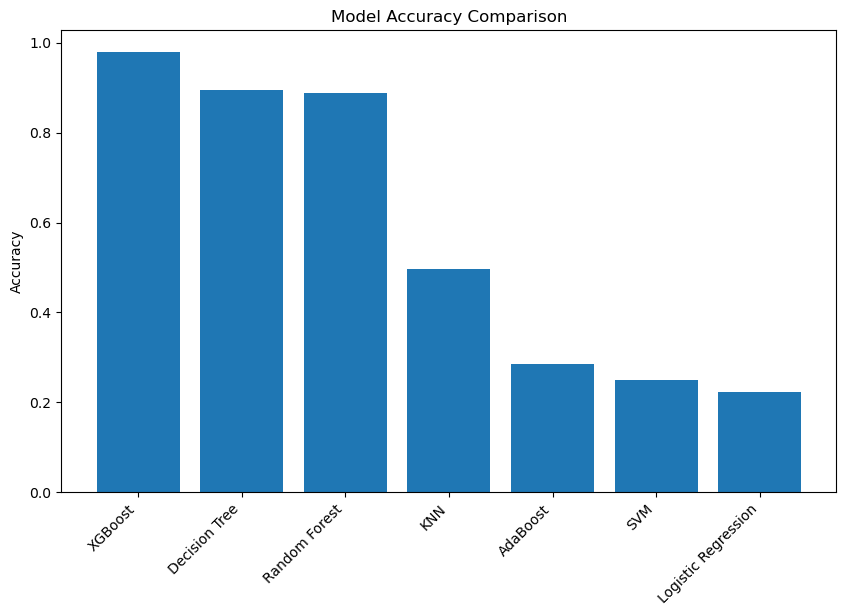

In [92]:
import matplotlib.pyplot as plt

# Bar chart for Accuracy
plt.figure(figsize=(10,6))
plt.bar(comparison_df["Model"], comparison_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.show()


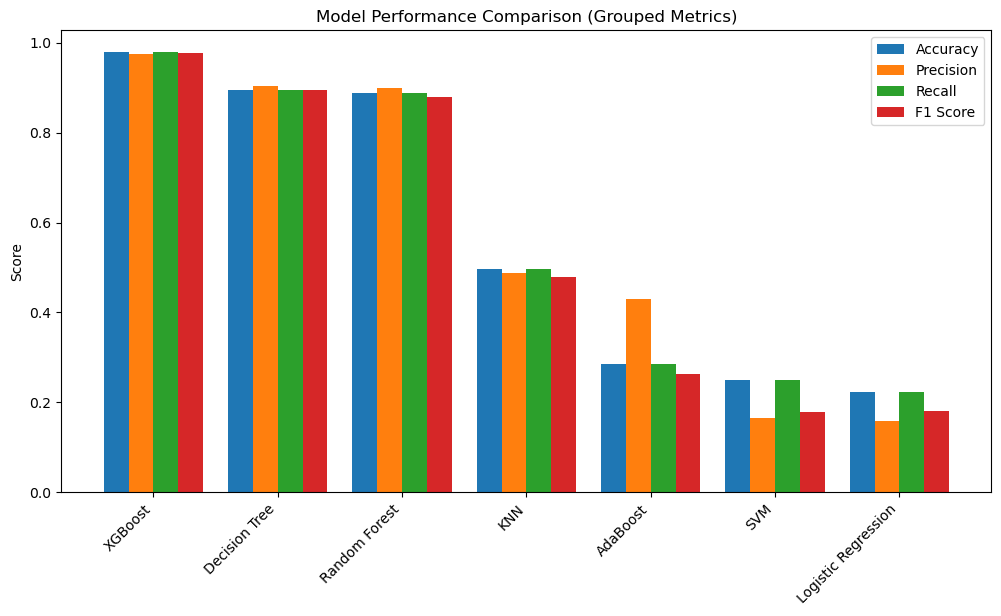

In [93]:
import numpy as np

# Extract metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(comparison_df["Model"]))  # model positions
width = 0.2  # width of each bar

plt.figure(figsize=(12,6))

# Plot each metric side by side
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison_df[metric], width, label=metric)

plt.xticks(x + width*1.5, comparison_df["Model"], rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Model Performance Comparison (Grouped Metrics)")
plt.legend()
plt.show()



# Hyperparameter Tuning 

In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# ---------------------------

# RandomizedSearchCV (faster for large search spaces)
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,   # Number of random combinations
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Best Parameters from RandomizedSearchCV:")
print(random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters from GridSearchCV:
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy:  0.9735444806707033
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from RandomizedSearchCV:
{'subsample': 0.9, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}
Best Accuracy:  0.9700046576618536


In [95]:
import joblib
import pandas as pd

# ==========================
# SAVE MODEL
# ==========================
joblib.dump(best_model, "best_model.pkl")
print(" Model saved successfully as best_model.pkl")

# ==========================
# LOAD MODEL
# ==========================
loaded_model = joblib.load("best_model.pkl")
print(" Model loaded successfully")

# ==========================
# PREDICT (encoded output)
# ==========================
# Example: encoded input values (must match training column order)
new_match = pd.DataFrame([{
    'team1': 3,          # encoded team1
    'team2': 6,          # encoded team2
    'toss_winner': 3,    # encoded toss winner
    'toss_decision': 1,  # encoded toss decision
    'result': 0,         # encoded result
    'win_by_runs': 0,
    'win_by_wickets': 5
}])

# Predict winner (encoded)
pred_encoded = loaded_model.predict(new_match)[0]
print("Predicted Winner (encoded):", pred_encoded)


 Model saved successfully as best_model.pkl
 Model loaded successfully
Predicted Winner (encoded): 6


## CROSS VALIDATION

In [96]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating: {name}")
    
    acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted', error_score='raise').mean()
    rec = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()
    
    results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Accuracy', ascending=False)
print(df_results)

Evaluating: Logistic Regression
Evaluating: SVM
Evaluating: KNN
Evaluating: Decision Tree
Evaluating: Random Forest
Evaluating: XGBoost
                 Model  Accuracy  Precision  Recall  F1 Score
5              XGBoost     0.972      0.971   0.972     0.970
3        Decision Tree     0.919      0.935   0.927     0.929
4        Random Forest     0.882      0.888   0.877     0.874
2                  KNN     0.474      0.452   0.474     0.453
1                  SVM     0.291      0.194   0.291     0.213
0  Logistic Regression     0.206      0.173   0.206     0.180


# Final Model and its Preformances

* The Best Model is XGBoost
* Highest Performance Metrics
* Balanced Performance
* Minimal Misclassifications
* Consistently identifies correct classes.

# Conclusion

### Further Improvements

* Advanced Hyperparameter Tuning by using Bayesian Optimization
* Continuous Learning with new latest data
* Model Monitoring and continue tuning

### Challenges 

* Model building and training
* Visualizing Performances Metrics